# Principal Component Analysis

In this section we are going to learn in depth about how we can use one of the most important concept of machine learning i.e. *Principal Component Analysis* which plays an important role in dimesionality reduction, feature engineering, feature extractions. It also plays an important role in unsupervised learning.

Let's import some important libraries

In [1]:
#  base librarie
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sanidhya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Introduction to PCA

*PCA* is one of the most used and delivered method of unsupervised learning for dimensioanlity reduction which can be an important concept in the terms of feature engineering 

Let's take an example:

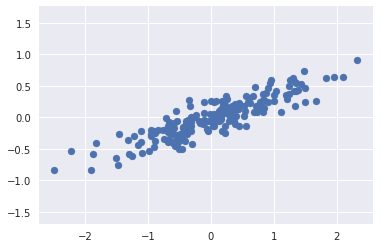

In [26]:
# making a dataset 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T

# plotting of dataset 
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

By eye its clear that there exists an linear relationship between the components of the data points and with the help of X we can easily predict the values of y, but here senario is pretty different we are aiming to learn the features and the relationship between them so here comes the principle component analysis in the picture.

To achieve our goal we'll be using `PCA` class from the *Scikit-Learn* library.

In [27]:
# importing pca 
from sklearn.decomposition import PCA

# making a pca obj 
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# pca components 
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [29]:
# pca variacne
pca.explained_variance_

array([0.7625315, 0.0184779])

we are using components to define direction of vectors and using explained_variance we are showing squared sum of vectors

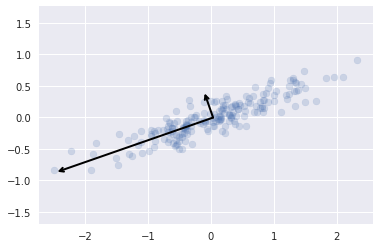

In [30]:
# make function to draw vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.